### 1. Write a python program of naive bayes classifier for iris dataset classification .

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9555555555555556


### 2.  Write a python program of naive bayes classifier for Play Tennis dataset classification

In [13]:
import nltk
from nltk.corpus import movie_reviews
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy

nltk.download('movie_reviews')

def extract_features(words):
    return dict([(word, True) for word in words])

positive_reviews = [(extract_features(movie_reviews.words(fileids=[f])), 'positive') for f in movie_reviews.fileids('pos')]
negative_reviews = [(extract_features(movie_reviews.words(fileids=[f])), 'negative') for f in movie_reviews.fileids('neg')]

split_ratio = 0.8
positive_split = int(len(positive_reviews) * split_ratio)
negative_split = int(len(negative_reviews) * split_ratio)

train_set = positive_reviews[:positive_split] + negative_reviews[:negative_split]
test_set = positive_reviews[positive_split:] + negative_reviews[negative_split:]

classifier = NaiveBayesClassifier.train(train_set)

accuracy_percentage = accuracy(classifier, test_set)
print(f'Accuracy: {accuracy_percentage * 100:.2f}%')

new_review = "This is the Excellent Movie I watched it 30 times."
new_review_features = extract_features(new_review.split())
classification = classifier.classify(new_review_features)
print(f'The review is classified as: {classification}')

new_review = "This is the worst Movie I watched and wasted time."
new_review_features = extract_features(new_review.split())
classification = classifier.classify(new_review_features)
print(f'The review is classified as: {classification}')


[nltk_data] Downloading package movie_reviews to C:\Users\VINAY
[nltk_data]     BHUPELLI\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


Accuracy: 73.50%
The review is classified as: positive
The review is classified as: negative


### 3. Write a python program of naive bayes classifier for Large Movie Review Dataset dataset classification

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the Play Tennis dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy',
                'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild',
                    'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal',
                 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak',
             'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
                   'Yes', 'Yes', 'Yes', 'No']
}

# Convert data to pandas DataFrame
import pandas as pd
df = pd.DataFrame(data)

# Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

# Split dataset into features and target variable
X = df_encoded.drop('PlayTennis', axis=1)
y = df_encoded['PlayTennis']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier using the training data
gnb.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")



Accuracy: 60.0 %


### compare logistic error function and least square error for the hypothesis
### y = 1/1+(e^-(w0+w1x1+w2x2)) where
### error function is logistic error function

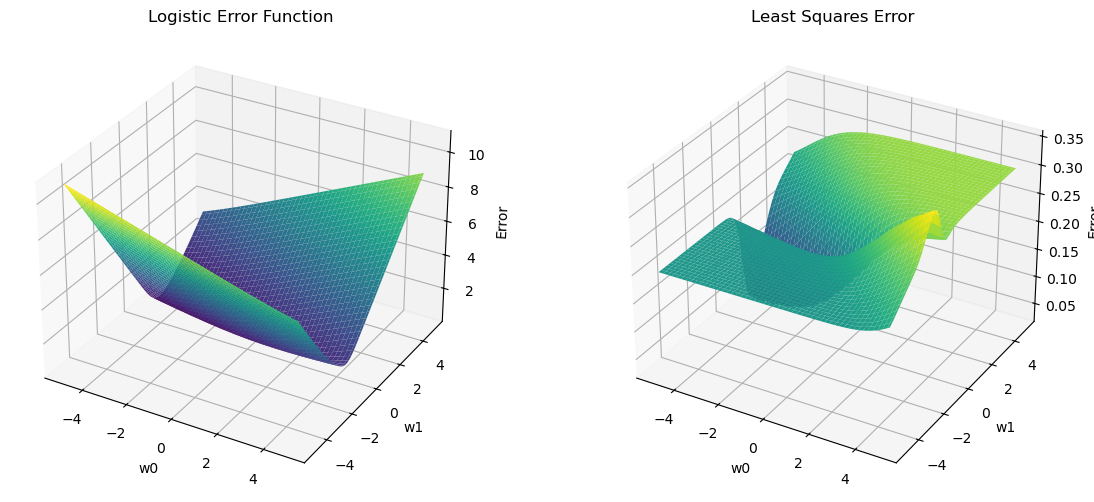

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([0, 0, 0, 1, 1])

# Define logistic error function
def logistic_error(w0, w1):
    y_hat = 1 / (1 + np.exp(-(w0 + w1 * x)))
    error = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return error

# Define least squares error function
def least_squares_error(w0, w1):
    y_hat = 1 / (1 + np.exp(-(w0 + w1 * x)))
    error = 0.5 * np.mean((y - y_hat)**2)
    return error

w0_vals = np.linspace(-5, 5, 100)
w1_vals = np.linspace(-5, 5, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)

logistic_errors = np.array([[logistic_error(w0, w1) for w0 in w0_vals] for w1 in w1_vals])
least_squares_errors = np.array([[least_squares_error(w0, w1) for w0 in w0_vals] for w1 in w1_vals])

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(W0, W1, logistic_errors, cmap='viridis')
ax1.set_title('Logistic Error Function')
ax1.set_xlabel('w0')
ax1.set_ylabel('w1')
ax1.set_zlabel('Error')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(W0, W1, least_squares_errors, cmap='viridis')
ax2.set_title('Least Squares Error')
ax2.set_xlabel('w0')
ax2.set_ylabel('w1')
ax2.set_zlabel('Error')

plt.show()
